# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Summary of the Notebook:

The ***Main Goal of this project is to figure out if the customer will respond to the offer given to them***

This Notebook will guide through the process of buidling a Machine Learning Model to achive this using the below steps:

1. Analyse the dataset by exploring them and visualizing.
2. Data Analysis using graphs.
3. Preprocessing the data.
4. Applying ML models for prediction.
5. Analysing the models and understanding the results.

# Questions that this notebook answers are :

1. Percentage of Customers spread across the gender.
2. Salary range of the customers.
3. Distribution of Male and female income of the customer base.
4. Which offer is more popular among which gender.
5. Amount of time taken for each gender to complete the offer given in days.
6. Which offer type is more popular among the gender and age.
7. Which gender like which kind of the offer most?
8. *** Finally predicting will the customer respond to the offer given to them ***

### Importing Libraries that are needed for this program.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import json
import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Data Exploration, Preparation and Analysis:

### Dataset 1: Portfolio: 
#### Step 1: Data Exploration

In [2]:
portfolio.head() # quick view of the dataset.

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [3]:
port=portfolio.copy() # Copying the original dataset so that it remains clean.

In [4]:
# grouping the offers by their type 
portfolio.groupby('offer_type')['id'].count()

offer_type
bogo             4
discount         4
informational    2
Name: id, dtype: int64

In [5]:
# replacing the categorical values in the 'offer_id' column by numberical values
port.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [6]:
port.isna().sum() # Checking if there are any na columns.

channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64

#### Step2 : Data Preparation.

In [7]:
def process_portfolio_data(port_new):
    
    '''
    This function takes portfolio dataset as an input and process it on below steps
    1. it creates dummy variables for channels.
    2. it creates dummy variables for Offer Type.
    3. Renames Id to Offer Id.
    4. Maps offer id to simple int values.
    5. Encodes Offer type.
    
    inputs:
    1. Portfolio dataframe.
    
    ouputs:
    1. Final dataframe with dummy columns Portfolio final.
    '''
    
    df1=pd.get_dummies(port_new['channels'].apply(pd.Series).stack()).sum(level=0)
    df1.reset_index(drop=True, inplace=True)
    offer_type = pd.get_dummies(port_new['offer_type'])
    final_df= pd.concat([port_new,offer_type, df1],axis=1)
    # renaming 'id' column to offer_id.
    final_df.rename(columns={'id':'offer_id'},inplace=True)
    final_df.drop(['channels'], axis=1, inplace=True)
    # Altering the offer id column and encode it with  by integers representing each offer type.
    off_id = final_df['offer_id'].astype('category').cat.categories.tolist()
    replace_id_col = {'offer_id' : {i: j for i,j in zip(off_id,list(range(1,len(off_id)+1)))}}
    final_df.replace(replace_id_col, inplace=True)
    # Altering the offer type column and encode it with  by integers representing each offer type.
    replace_offer_col = final_df['offer_type'].astype('category').cat.categories.tolist()
    replace_offer_col = {'offer_type' : {l: m for l,m in zip(replace_offer_col,list(range(1,len(replace_offer_col)+1)))}}
    final_df.replace(replace_offer_col, inplace=True)
    
    portfolio_final=final_df
    
    return portfolio_final,replace_id_col

In [8]:
portfolio_final,replace_id=process_portfolio_data(port)# Calling the process portfolio data.
portfolio_final.head()

,difficulty,duration,offer_id,offer_type,reward,bogo,discount,informational,email,mobile,social,web
0,10,7,8,1,10,1,0,0,1,1,1,0
1,10,5,5,1,10,1,0,0,1,1,1,1
2,0,4,4,3,0,0,0,1,1,1,0,1
3,5,7,7,1,5,1,0,0,1,1,0,1
4,20,10,1,2,5,0,1,0,1,0,0,1


In [9]:
# checking for duplicates
portfolio_final.columns.duplicated().sum()

0

### Dataset 2: Profile:

#### Step 1 : Profile Dataset- Data Exploration 

In [10]:
profile.head()# A quick view of profile dataset.

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [11]:
# checking the number of rows and columns of the dataset
profile.shape

(17000, 5)

In [12]:
# Exploring the male and female percentage in the dataset.
gender_counts = profile['gender'].value_counts()
gender_counts *= 100 / gender_counts.sum()
gender_counts

M    57.227656
F    41.342327
O     1.430017
Name: gender, dtype: float64

### 1. Percentage of Customers spread across the gender.

Text(0.5,1,'Percentage of customers based on gender')

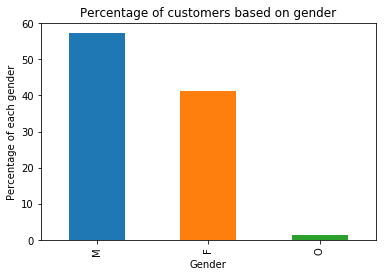

In [13]:
gender_counts.plot.bar()
plt.xlabel("Gender")
plt.ylabel("Percentage of each gender")
plt.title("Percentage of customers based on gender")

As we observe the above graph it clearly indicates that Male customer base of Starbucks is higher when compared to the female customer base. The male gender constitutes 57%.

In [14]:
# checking for the existence of missing values(NaNs)
profile.isna().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [15]:
profile[profile['income'].notnull()].describe()# Description of the dataset.

,age,became_member_on,income
count,14825.000000,1.482500e+04,14825.000000
mean,54.393524,2.016689e+07,65404.991568
std,17.383705,1.188565e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,42.000000,2.016052e+07,49000.000000
50%,55.000000,2.017080e+07,64000.000000
75%,66.000000,2.017123e+07,80000.000000
max,101.000000,2.018073e+07,120000.000000


#### Step2: Data Preparation of Profile Dataset.

In [16]:
def process_profile_data(profile_new):
    
    '''
    This function takes profile dataset as an input and process it on below steps
    1. it creates encoding for gender
    2. number of days since membership column.
    3. Renames Id to Customer ID.
    4. Maps age to groups.
    5. Income to groups like Basic, Average, high.
    
    inputs:
    1. profile dataframe.
    
    ouputs:
    1. Final dataframe with encoding and numbr of member days columns profile final.
    '''
    profile_new['gender'].replace({'F':0,'M':1,'O':2},inplace=True)
    profile_new = profile_new.dropna()
    profile_new.gender.astype(int)
    profile_new = profile_new.dropna()
    profile_new['daysofmembership'] = datetime.datetime.today().date() - pd.to_datetime(profile['became_member_on'], 
                                     format='%Y%m%d').dt.date
    profile_new['daysofmembership'] = profile_new['daysofmembership'].dt.days
    profile_new = profile_new.dropna()
    profile_new.rename(columns={'id':'customer_id'},inplace=True)
    client_id = profile_new['customer_id'].astype('category').cat.categories.tolist()
    replace_prof_id = {'customer_id' : {i: j for i,j in zip(client_id,list(range(1,len(client_id)+1)))}}
    profile_new.replace(replace_prof_id, inplace=True)
    profile_new = profile_new.dropna()
    
    # representing the age group to which the customer belongs 
    profile_new['age_group'] = pd.cut(profile_new['age'], bins=[18, 24, 32, 55, 103],labels=[1, 2, 3, 4])
    
    profile_new['income_level'] = pd.cut(profile_new['income'], bins=[30000, 65000, 95000, 125000],
                                         labels=['Basic', 'average', 'high'])
    
    income_label = profile_new['income_level'].astype('category').cat.categories.tolist()
    replace_inc = {'income_level' : {l: m for l,m in zip(income_label,list(range(1,len(income_label)+1)))}}
    profile_new.replace(replace_inc, inplace=True)
    profile_new.drop(columns = ['became_member_on'], axis=1, inplace=True)
    
    return profile_new,replace_prof_id,replace_inc
    

In [17]:
profile_new=profile.copy()
profile_new,replace_prof_id,replace_inc=process_profile_data(profile_new)
profile_new.head()

,age,gender,customer_id,income,daysofmembership,age_group,income_level
1,55,0.0,347,112000.0,1077,3,3.0
3,75,0.0,6963,100000.0,1144,4,3.0
5,68,1.0,13108,70000.0,792,4,2.0
8,65,1.0,3247,53000.0,868,4,1.0
12,58,1.0,2670,51000.0,958,4,1.0


In [18]:
profile_new.dtypes# Understanding the datatypes.

age                    int64
gender               float64
customer_id            int64
income               float64
daysofmembership       int64
age_group           category
income_level         float64
dtype: object

In [19]:
profile_new.isnull().sum(axis=0) * 100 / profile.shape[0] # Checking if there are any nulls.

age                 0.000000
gender              0.000000
customer_id         0.000000
income              0.000000
daysofmembership    0.000000
age_group           0.411765
income_level        0.517647
dtype: float64

Text(0.5,1,'The Persons Number of Different Age')

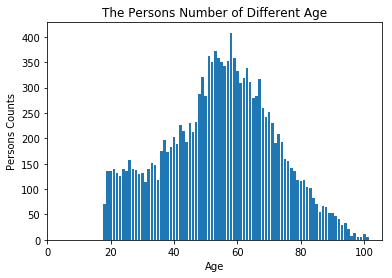

In [20]:
# Distribution of Age of Customers
age_1=profile_new.groupby(['age']).size().reset_index(name='counts')
plt.bar(age_1['age'],age_1['counts'],align='center')
plt.xticks(np.arange(0, 118, 20))
plt.xlabel('Age')
plt.ylabel('Persons Counts')
plt.title('The Persons Number of Different Age')

The distribution of age is symettric about the center, most of customers are between 20 to 60 years of age and majority of them are in category 40 to 60 years.

### Understanding the catefory of each salary category.

Text(0.5,1,'A view on income group levels')

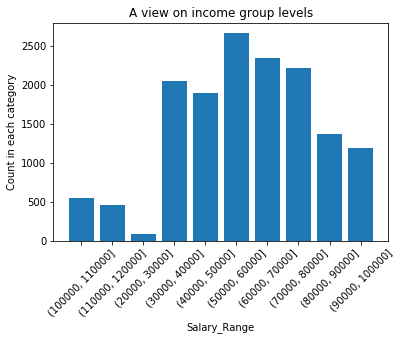

In [21]:
income_group=profile_new.groupby(pd.cut(profile_new['income'], np.arange(20000, 120000+10000, 10000)))['customer_id'].count().to_frame()
income_group['income_group'] = income_group.index
income_group['income_group'] = income_group.income_group.astype('str')
plt.bar(income_group['income_group'],income_group['customer_id'])
plt.xlabel('Salary_Range')
plt.xticks(rotation=45)
plt.ylabel('Count in each category')
plt.title('A view on income group levels')

From the above graph it is clear that income group 40000 to 50000$ visit the startbucks often.

### Distribution of Male and female customer salary.

Text(0.5,1,'Male Customer Income')

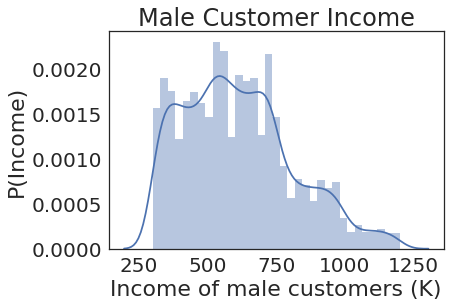

In [22]:
female_customers = profile_new[profile_new['gender'] == 0]
male_customers = profile_new[profile_new['gender'] == 1]
other_customers = profile_new[profile_new['gender'] == 3]


sns.set(font_scale=2.0)
sns.set_style('white')

sns.distplot(male_customers['income'] *1E-2)
plt.xlabel('Income of male customers (K)')
plt.ylabel('P(Income)')
plt.title('Male Customer Income')

Text(0.5,1,'Female Customer Income')

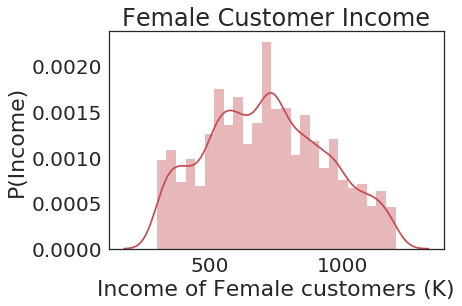

In [23]:
current_palette = sns.color_palette()

sns.set(font_scale=2.0)
sns.set_style('white')

sns.distplot(female_customers['income'] *1E-2,
             color=current_palette[2])
plt.xlabel('Income of Female customers (K)')
plt.ylabel('P(Income)')
plt.title('Female Customer Income')

### Dataset 3: Transcipt:

In [24]:
transcript.head()# quick view into transcript data.

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [25]:
# checking for duplicates
transcript.columns.duplicated().sum()

0

In [26]:
transcript.event.unique() # Type of event.

array(['offer received', 'offer viewed', 'transaction', 'offer completed'], dtype=object)

In [27]:
# checking for the existence of missing values(NaNs)
transcript.isna().sum()

event     0
person    0
time      0
value     0
dtype: int64

In [28]:
# checking the count of each event type
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [29]:
def process_transcript(trans,replace_prof_id,replace_id):
    
    '''
    This function takes transcript dataset as an input and process it on below steps
    1. it Renames person to customer Id
    2. creating columns for reward and amount.
    3. Filtering out Transaction and offer recieved columns.
    4. Dropping NA columns.
    
    inputs:
    1. profile dataframe.
    
    ouputs:
    1. Final dataframe with encoding and numbr of member days columns profile final.
    
    '''
    
    trans.rename(columns={'person':'customer_id'},inplace=True)
    cust_id = trans['customer_id'].astype('category').cat.categories.tolist()
    replace_prof_id = {'customer_id' : {k: v for k,v in zip(cust_id,list(range(1,len(cust_id)+1)))}}
    trans.replace(replace_prof_id, inplace=True)
    #trans.replace(replace_prof_id, inplace=True)
    trans=trans.dropna()
    trans['offer_id'] = '' 
    trans['amount'] = 0 
    trans['reward'] = 0
    for row1, index1 in trans.iterrows():
        for j in index1['value']:
            if j == 'offer_id' or j == 'offer id': 
                trans.at[row1, 'offer_id'] = index1['value'][j]
            if j == 'amount':
                trans.at[row1, 'amount'] = index1['value'][j]
            if j == 'reward':
                trans.at[row1, 'reward'] = index1['value'][j]
    trans=trans.dropna()
    trans['offer_id'] = trans['offer_id'].apply(lambda x: 'N/A' if x == '' else x)
    trans=trans.dropna()
    trans.drop('value', axis=1, inplace=True)
    trans=trans.dropna()
    trans = trans[trans['event'] != 'transaction']
    trans = trans[trans['event'] != 'offer received']
    offer_status = trans['event'].astype('category').cat.categories.tolist()
    replace_status = {'event' : {i: j for i,j in zip(offer_status,list(range(1,len(offer_status)+1)))}}
    trans.replace(replace_status, inplace=True)
    trans.replace(replace_id, inplace=True)
    trans=trans.dropna()
    
    return trans

In [30]:
trans=transcript.copy()
transcipt_final=process_transcript(trans,replace_prof_id,replace_id)
transcipt_final.head()

,event,customer_id,time,offer_id,amount,reward
12650,2,3729,0,9,0,0
12651,2,13995,0,6,0,0
12652,2,1052,0,5,0,0
12653,2,170,0,8,0,0
12655,2,12744,0,6,0,0


In [31]:
transcipt_final.dtypes# Gettign the datatypes.

event          int64
customer_id    int64
time           int64
offer_id       int64
amount         int64
reward         int64
dtype: object

### Combining the datasets

In [32]:
combined_df =transcipt_final.merge(portfolio_final,how='left',on='offer_id')
combined_df.head()

,event,customer_id,time,offer_id,amount,reward_x,difficulty,duration,offer_type,reward_y,bogo,discount,informational,email,mobile,social,web
0,2,3729,0,9,0,0,5,5,1,5,1,0,0,1,1,1,1
1,2,13995,0,6,0,0,0,3,3,0,0,0,1,1,1,1,0
2,2,1052,0,5,0,0,10,5,1,10,1,0,0,1,1,1,1
3,2,170,0,8,0,0,10,7,1,10,1,0,0,1,1,1,0
4,2,12744,0,6,0,0,0,3,3,0,0,0,1,1,1,1,0


In [33]:
combined_df = combined_df.merge(profile_new,how ='left', on = 'customer_id')
combined_df.head()

,event,customer_id,time,offer_id,amount,reward_x,difficulty,duration,offer_type,reward_y,...,email,mobile,social,web,age,gender,income,daysofmembership,age_group,income_level
0,2,3729,0,9,0,0,5,5,1,5,...,1,1,1,1,49.0,0.0,56000.0,1000.0,3.0,1.0
1,2,13995,0,6,0,0,0,3,3,0,...,1,1,1,0,18.0,1.0,37000.0,783.0,NaN,1.0
2,2,1052,0,5,0,0,10,5,1,10,...,1,1,1,1,61.0,1.0,96000.0,1439.0,4.0,3.0
3,2,170,0,8,0,0,10,7,1,10,...,1,1,1,0,21.0,0.0,74000.0,1310.0,1.0,2.0
4,2,12744,0,6,0,0,0,3,3,0,...,1,1,1,0,59.0,1.0,34000.0,1422.0,4.0,1.0


In [34]:
combined_df=combined_df.dropna()

In [35]:
Final_dataframe=combined_df.copy()
combined_df.dtypes

event                  int64
customer_id            int64
time                   int64
offer_id               int64
amount                 int64
reward_x               int64
difficulty             int64
duration               int64
offer_type             int64
reward_y               int64
bogo                   uint8
discount               uint8
informational          uint8
email                  uint8
mobile                 uint8
social                 uint8
web                    uint8
age                  float64
gender               float64
income               float64
daysofmembership     float64
age_group           category
income_level         float64
dtype: object

### Analysis on the Combined dataframe:

In [36]:
combined_df_mapping=combined_df.copy()

In [37]:
combined_df['event'] = combined_df['event'].map({1.0: 'Completed', 2.0: 'Viewed'})
combined_df['offer_type'] = combined_df['offer_type'].map({1.0: 'BOGO', 2.0: 'Discount', 3.0: 'Informational'})
combined_df['income_level'] = combined_df['income_level'].map({1.0: 'Basic', 2.0: 'average', 3.0:'high'})
combined_df['age_group'] = combined_df['age_group'].map({1.0: 'teenager', 2.0: 'young-adult', 3.0:'adult', 4.0:'elderly'})
combined_df.head()

,event,customer_id,time,offer_id,amount,reward_x,difficulty,duration,offer_type,reward_y,...,email,mobile,social,web,age,gender,income,daysofmembership,age_group,income_level
0,Viewed,3729,0,9,0,0,5,5,BOGO,5,...,1,1,1,1,49.0,0.0,56000.0,1000.0,adult,Basic
2,Viewed,1052,0,5,0,0,10,5,BOGO,10,...,1,1,1,1,61.0,1.0,96000.0,1439.0,elderly,high
3,Viewed,170,0,8,0,0,10,7,BOGO,10,...,1,1,1,0,21.0,0.0,74000.0,1310.0,teenager,average
4,Viewed,12744,0,6,0,0,0,3,Informational,0,...,1,1,1,0,59.0,1.0,34000.0,1422.0,elderly,Basic
5,Viewed,10702,0,3,0,0,10,7,Discount,2,...,1,1,0,1,51.0,0.0,106000.0,1684.0,adult,high


In [38]:
# Mapping back the gender to Male and Female.
df=combined_df[['gender','income_level']]
df['gender'] = df['gender'].map({0.0: 'Female', 1.0: 'Male',2.0:'Other'})
df.head()

,gender,income_level
0,Female,Basic
2,Male,high
3,Female,average
4,Male,Basic
5,Female,high


### 3. Distribution of Male and female income of the customer base.

Text(0,0.5,'Income Level')

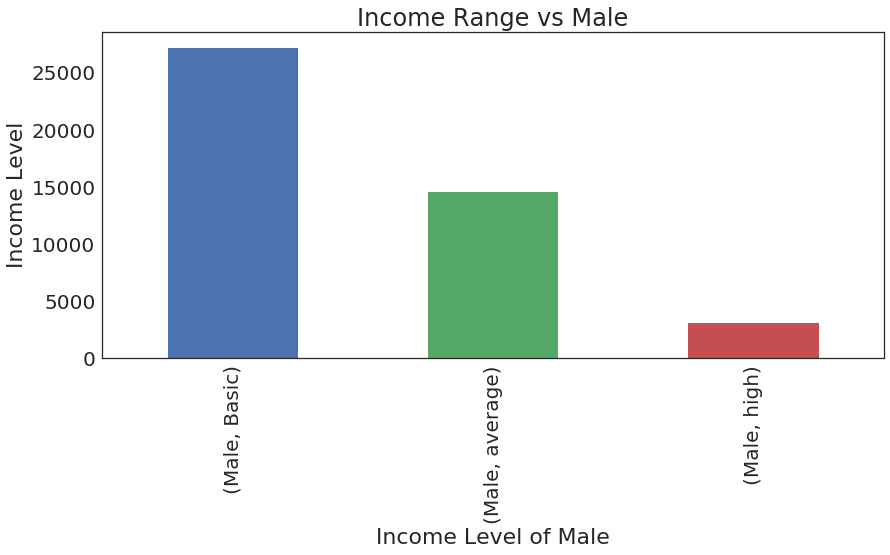

In [39]:
df=combined_df[['gender','income_level']]
plt.figure(figsize=(14, 6))
df['gender'] = df['gender'].map({0.0: 'Female', 1.0: 'Male',2.0:'Other'})
df = df[df['gender'] != 'Female']
df = df[df['gender'] != 'Other']
groups = df.groupby(['gender','income_level']).size()
groups.plot.bar()
plt.title('Income Range vs Male')
plt.xlabel('Income Level of Male')
plt.ylabel('Income Level')

From the above visualization it is observed that Male customer base belong to basic salary range 30k to 40k salary range. The high salaried males are less in number.

Text(0,0.5,'Income Level')

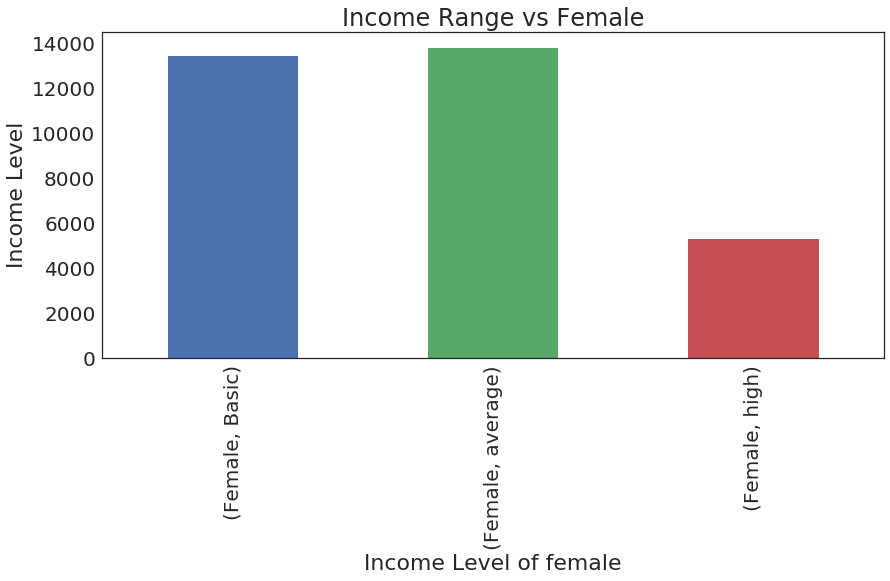

In [40]:
df=combined_df[['gender','income_level']]
plt.figure(figsize=(14, 6))
df['gender'] = df['gender'].map({0.0: 'Female', 1.0: 'Male',2.0:'Other'})
df = df[df['gender'] != 'Male']
df = df[df['gender'] != 'Other']
groups = df.groupby(['gender','income_level']).size()
groups.plot.bar()
plt.title('Income Range vs Female')
plt.xlabel('Income Level of female')
plt.ylabel('Income Level')

In Female customer base its the average salary holders are leading the higher and lower salaries female base. It indicates Female with average salary more often visit the starbucks.

Text(0,0.5,'Income Level')

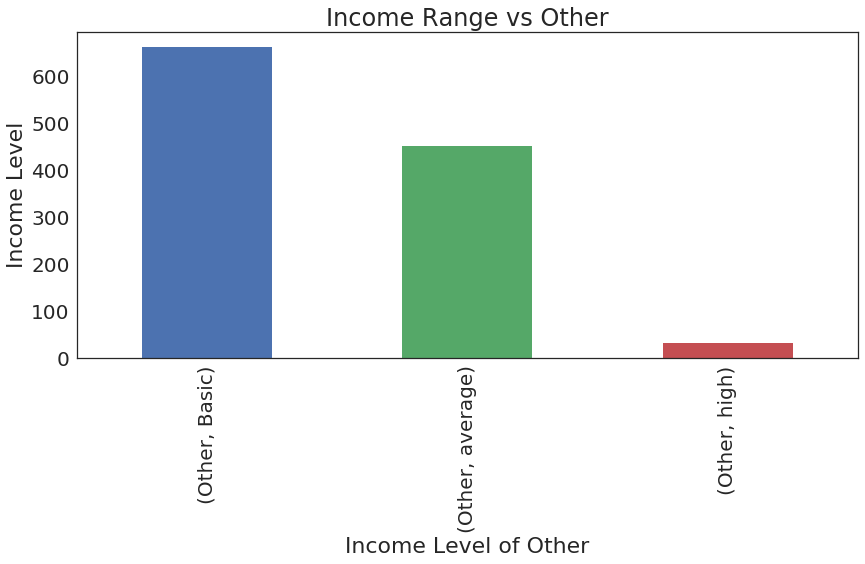

In [41]:
df=combined_df[['gender','income_level']]
plt.figure(figsize=(14, 6))
df['gender'] = df['gender'].map({0.0: 'Female', 1.0: 'Male',2.0:'Other'})
df = df[df['gender'] != 'Male']
df = df[df['gender'] != 'Female']
groups = df.groupby(['gender','income_level']).size()
groups.plot.bar()
plt.title('Income Range vs Other')
plt.xlabel('Income Level of Other')
plt.ylabel('Income Level')

### Combined graph for the income based on the income category.

Text(0,0.5,'Income Level')

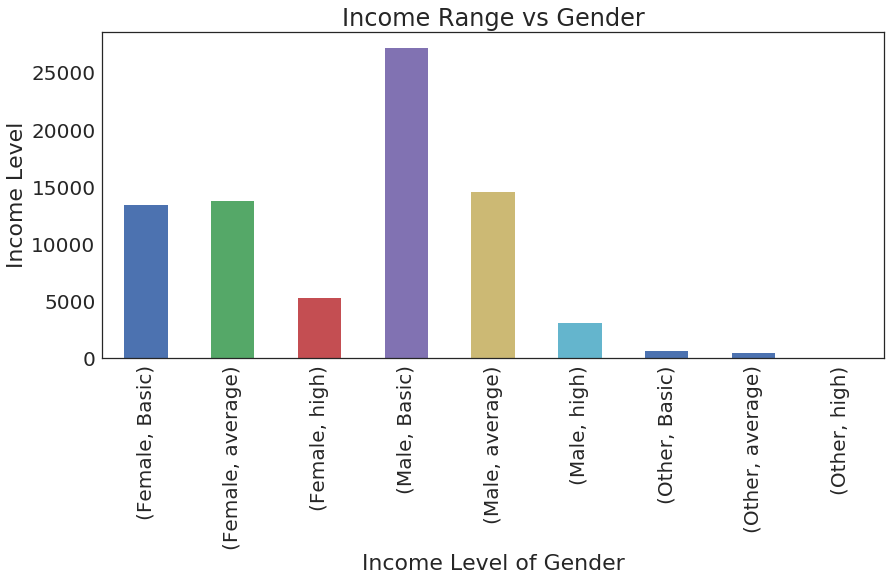

In [42]:
df=combined_df[['gender','income_level','offer_id','time']]
plt.figure(figsize=(14, 6))
df['gender'] = df['gender'].map({0.0: 'Female', 1.0: 'Male',2.0:'Other'})
groups = df.groupby(['gender','income_level']).size()
groups.plot.bar()
plt.title('Income Range vs Gender')
plt.xlabel('Income Level of Gender')
plt.ylabel('Income Level')

Overall Male with basic salary (40 to 50k) visit most often, then comes the male with average salary and followed by the women with average and high salary category. Overall male population lead the number of visit.

### 4. Quick view on Which Offer stage (Viewed or completed ) with respect to gender.

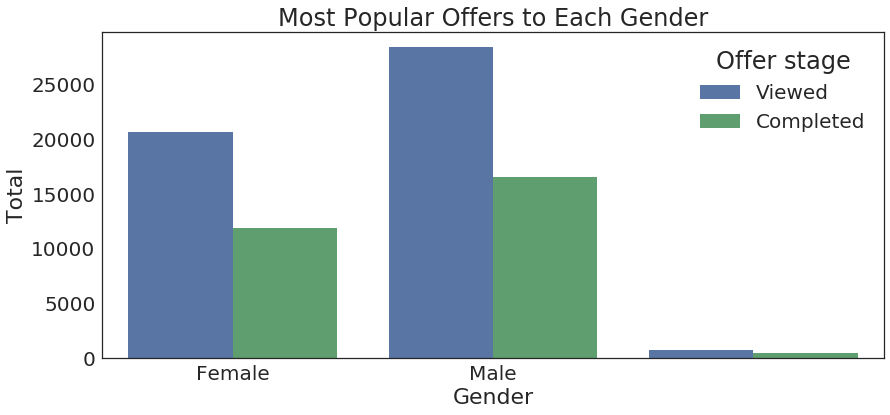

In [43]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='gender', hue="event", data= combined_df)
plt.title('Most Popular Offers to Each Gender')
plt.ylabel('Total')
plt.xlabel('Gender')
xlabels = ['Female', 'Male']
g.set_xticklabels(xlabels)
plt.legend(title='Offer stage')
plt.show()

The graphs indicate male lead in both viewing the offer and completing the offer more than Female gender. Male gender completes as offer twice the number of female.

### 5. Amount of time taken for each gender to complete the offer given in days.

Observing how long does each gender customer base take on average to complete the offer, small experiment showed that Male and female customers both complete in almost same number of days that is about ***16 days***

In [44]:
transaction_avg_time_female = df.groupby(['gender', 'offer_id'])['time'].mean().reset_index()
transaction_avg_time_male = df.groupby(['gender', 'offer_id'])['time'].mean().reset_index()

transaction_avg_time_female[transaction_avg_time_female['gender'] == 'Female']['time'].values[0]/24

16.967420814479638

In [45]:
transaction_avg_time_female[transaction_avg_time_female['gender'] == 'Male']['time'].values[0]/24

16.695419592109662

In [46]:
transaction_avg_time_female[transaction_avg_time_female['gender'] == 'Other']['time'].values[0]/24

16.752631578947369

### 6. A quick understanding of age group vs the offer stage.

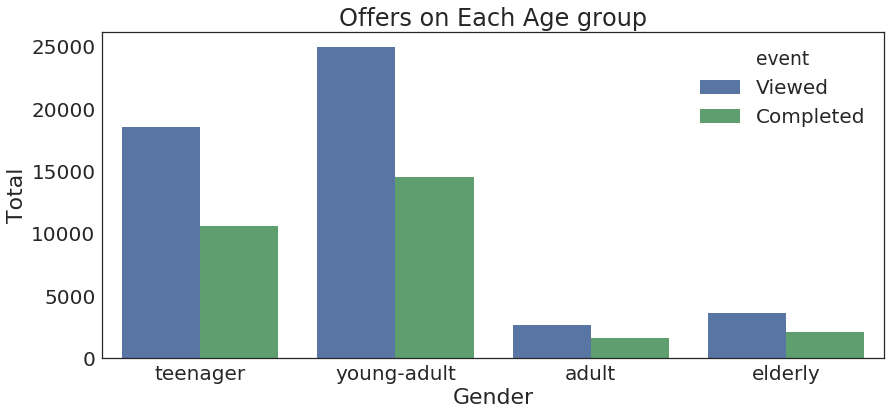

In [47]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='age_group', hue="event", data= combined_df[combined_df["gender"] != 3])
plt.title('Offers on Each Age group')
plt.ylabel('Total')
plt.xlabel('Gender')
xlabels = ['teenager', 'young-adult','adult','elderly']
g.set_xticklabels(xlabels)
plt.show();

It is clearn from graph that young adults  complete the offer quicker and then comes the teenagers who rush to complete the offer.

### 7. Which age group like which kind of Offer.

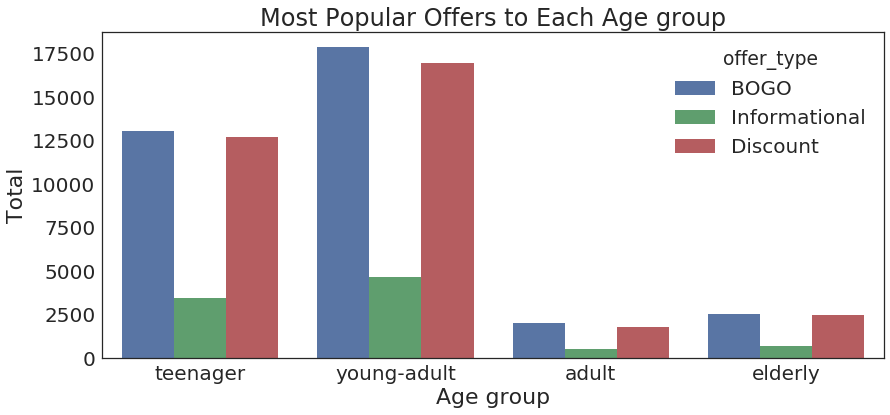

In [48]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='age_group', hue="offer_type", data= combined_df[combined_df["gender"] != 3])
plt.title('Most Popular Offers to Each Age group')
plt.ylabel('Total')
plt.xlabel('Age group')
xlabels = ['teenager', 'young-adult','adult','elderly']
g.set_xticklabels(xlabels)
plt.show();

The above graph tells the poplarity level of each offer type among the age groups, The overall Bogo offer is most popular among all the age groups. Next comes the discount both the teenagers and young adult like simlar offers.

### 8. Which gender like which kind of the offer most?

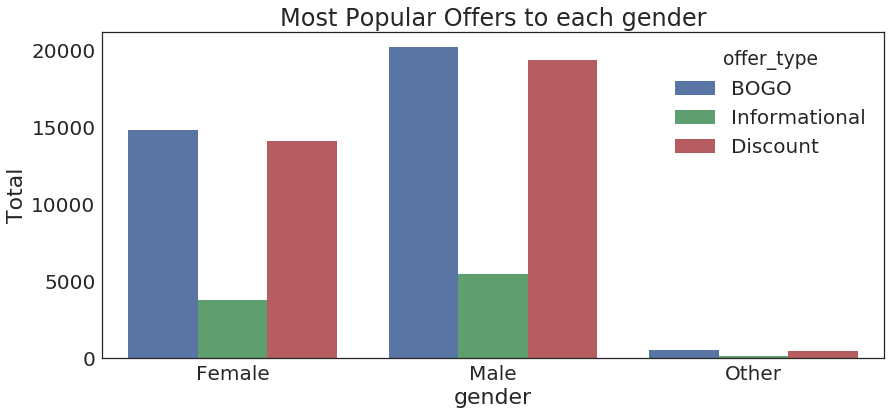

In [49]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='gender', hue="offer_type", data= combined_df[combined_df["gender"] != 3])
plt.title('Most Popular Offers to each gender')
plt.ylabel('Total')
plt.xlabel('gender')
xlabels = ['Female','Male','Other']
g.set_xticklabels(xlabels)
plt.show()

## Data Modeling : Applying Machine Learning Algorithm.

In [50]:
Final_dataframe.columns

Index(['event', 'customer_id', 'time', 'offer_id', 'amount', 'reward_x',
       'difficulty', 'duration', 'offer_type', 'reward_y', 'bogo', 'discount',
       'informational', 'email', 'mobile', 'social', 'web', 'age', 'gender',
       'income', 'daysofmembership', 'age_group', 'income_level'],
      dtype='object')

We need to split data into features and target labels, ONLY those features that we believe are important for our model to predict accurately.

Those features are as follows:

- time
- offer_id
- amount
- reward_x
- difficulty
- duration
- offer_type
- gender
- age_group
- income_range
- member_type
- Social
- Web
- age


Target columns are:  Event

1 : offer completed
2 : offer viewed

In [51]:
Final_dataframe.head()

,event,customer_id,time,offer_id,amount,reward_x,difficulty,duration,offer_type,reward_y,...,email,mobile,social,web,age,gender,income,daysofmembership,age_group,income_level
0,2,3729,0,9,0,0,5,5,1,5,...,1,1,1,1,49.0,0.0,56000.0,1000.0,3,1.0
2,2,1052,0,5,0,0,10,5,1,10,...,1,1,1,1,61.0,1.0,96000.0,1439.0,4,3.0
3,2,170,0,8,0,0,10,7,1,10,...,1,1,1,0,21.0,0.0,74000.0,1310.0,1,2.0
4,2,12744,0,6,0,0,0,3,3,0,...,1,1,1,0,59.0,1.0,34000.0,1422.0,4,1.0
5,2,10702,0,3,0,0,10,7,2,2,...,1,1,0,1,51.0,0.0,106000.0,1684.0,3,3.0


In [52]:
# Split the data into features and target label
X = Final_dataframe[['time','offer_id','amount','reward_x','email','mobile','social','web','age','difficulty','duration','offer_type','gender','age_group','income_level']]
Y = Final_dataframe['event']

### Spliting datainto train and test for further application of machine learning.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

# 1. Application of Support vector machines algorithm.

In [54]:
svm = SVC()
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
errors = abs(pred - y_test)
mean_APE = 100 * (errors / y_test)
accuracy = 100 - np.mean(mean_APE)
print("The accuracy of the testing set:",accuracy)

The accuracy of the testing set: 98.1111903065


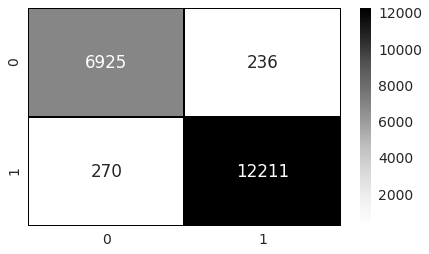

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test, pred)
sn.set(font_scale=1.4) # for label size
plt.figure(figsize = (7,4))
cm_heat1=sn.heatmap(cm,annot=True,cmap='Greys',linecolor='black',fmt='d',linewidths=1)

# 2. Applying Decesion Tree Data Mining  Model.

In [56]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
errors = abs(pred - y_test)
mean_APE = 100 * (errors / y_test)
accuracy = 100 - np.mean(mean_APE)
print("The accuracy of the test set:",accuracy)

The accuracy of the test set: 100.0


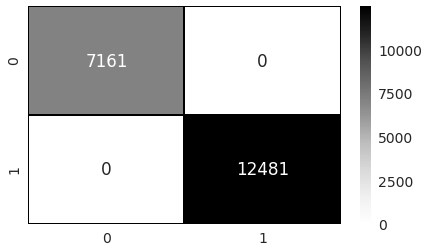

In [57]:
cm = confusion_matrix(y_test, pred)
sn.set(font_scale=1.4) # for label size
plt.figure(figsize = (7,4))
cm_heat1=sn.heatmap(cm,annot=True,cmap='Greys',linecolor='black',fmt='d',linewidths=1)

The above results show the accuracy of decision tree model and support vector machine superverised models. The accuracies on the test set from decesion tree model was 100% and svm was around 98%. Since our model was binary in nature if they view the offer or complete it based on features like age, gender, income range etc. Finally I would like to finalize Decesion tree model for this offer prediction. 

Observing the confusion matrix TPR is 100% and True negative rate is 0 which is very important for any model. Finally Decesion tree model is finalized for further prediction.

## Further Improvement

Further this model features can be impoved by including the NA values replaced with respective mean, mode values. In my case I have dropped for analysis. Further grid search can be implemented as the data keeps on comning which in turn could help in classification. Also further we could implement Neural Networks using tensorflow and predict more precisely which offer type will work for each individual.

# Conclusion:

***This project started with an idea to analyse if the customer just views the offer or completes the given offer.***

The project notebook started with analysing each every dataset individually, visualizing and finding the realtion between various factors like gender, age, income towards the offer. Processing of the dataset took quiet a significant amount of time and effor. The steps included creating features for further analysis and converting the text items into dummy columns. The dimensions like age, income were mapped into groups for categorizing the offers or prediction.

Age was categorized into 4 groups:

 - 1 : teenager
 - 2 : young-adult
 - 3 : adult
 - 4 : elderly

income into 4 groups

 - 1 : Basic
 - 2 : Average
 - 3 : High
 
The quick analysis on the datasets and the graphs:

1. income ranges from 30,000 and 115,000 with most of the customers.
2. it is observed that Male customer base belong to basic salary range 30k to 40k salary range. The high salaried males are less in number.
3. In Female customer base its the average salary holders are leading the higher and lower salaries female base. It indicates Female with average salary more often visit the starbucks.
4. Overall Male with basic salary (40 to 50k) visit most often, then comes the male with average salary and followed by the women with average and high salary category. Overall male population lead the number of visit.
5.  male lead in both viewing the offer and completing the offer more than Female gender. Male gender completes as offer twice the number of female.
6. Observing how long does each gender customer base take on average to complete the offer, small experiment showed that Male and female customers both complete in almost same number of days that is about ***16 days***.
7. young adults  complete the offer quicker and then comes the teenagers who rush to complete the offer.
8.  poplarity level of each offer type among the age groups, The overall Bogo offer is most popular among all the age groups. Next comes the discount both the teenagers and young adult like simlar offers.
9. The accuracies on the test set from decesion tree model was 100% and svm was around 98%. Since our model was binary in nature if they view the offer or complete it based on features like age, gender, income range etc. Finally I would like to finalize Decesion tree model for this offer prediction. 

### Take away from the project:

1. Data Processing skills.
2. Visualizing the dataset using graphs and pandas module.
3. Applying ML models for further prediction.
4. Storytelling from the project.

### Further Improvement:

Application of ML models to predict the which offer type Bogo, discount etc which is best for each indivdual using tensorflow deep learning model. Create a web application usign HTML and CSS.
 
